## CTR - NYT
---
Elo notes

Click-through rate (CTR) is the ratio of users who click on a specific link to the number of total users who view a page, email, or advertisement. It is commonly used to measure the success of an online advertising campaign for a particular website as well as the effectiveness of email campaigns.

The purpose of click-through rates is to measure the ratio of clicks to impressions of an online ad or email marketing campaign. Generally the higher the CTR the more effective the marketing campaign has been at bringing people to a website.

The click-through rate of an advertisement is defined as the number of clicks on an ad divided by the number of times the ad is shown (impressions), expressed as a percentage. For example, if a banner ad is delivered 100 times (100 impressions) and receives one click, then the click-through rate for the advertisement would be 1%.


${\displaystyle {\text{CTR}}={{\text{Clicks}} \over {\text{Impressions}}}\times 100}$

Click-through rates for banner ads have decreased over time. When banner ads first started to appear, it was not uncommon to have rates above five percent. They have fallen since then, currently averaging closer to 0.2 or 0.3 percent. In most cases, a 2% click-through rate would be considered very successful, though the exact number is hotly debated and would vary depending on the situation. The average click-through rate of 3% in the 1990s declined to 2.4%–0.4% by 2002. Since advertisers typically pay more for a high click-through rate, getting many click-throughs with few purchases is undesirable to advertisers. Similarly, by selecting an appropriate advertising site with high affinity (e.g., a movie magazine for a movie advertisement), the same banner can achieve a substantially higher CTR. Though personalized ads, unusual formats, and more obtrusive ads typically result in higher click-through rates than standard banner ads, overly intrusive ads are often avoided by viewers.

Modern online advertising has moved beyond just using banner ads. Popular search engines allow advertisers to display ads in with the search results triggered by a search user. These ads are usually in text format and may include additional links and information like phone numbers, addresses and specific product pages. This additional information moves away from the poor user experience that can be created from intrusive banner ads and provides useful information to the search user, resulting in higher Click-through rates for this format of Pay Per Click Advertising. Having high click-through rate isn't the only goal for an online advertiser who will occasionally develop campaigns to raise awareness and sacrifice click-through rate for the overall gain of valuable traffic.

#### Estimating the Click-Through Rate for Ads
Search engine advertising has become a significant element of the Web browsing experience. Choosing the right ads for the query and the order in which they are displayed greatly affects the probability that a user will see and click on each ad. This ranking has a strong impact on the revenue the search engine receives from the ads. Further, showing the user an ad that they prefer to click on improves user satisfaction. For these reasons, there is an increasing interest in accurately estimating the click-through rate of ads in a recommender system.

In [4]:
from itertools import combinations
from __future__ import division

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scis

%matplotlib inline

In [5]:
alpha = 0.05/23

In [6]:
alpha

0.002173913043478261

In [22]:
df = pd.read_csv('nyt1.csv')

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,458441,29.482551,23.607034,0,0,31,48,108
Gender,458441,0.367037,0.481997,0,0,0,1,1
Impressions,458441,5.007316,2.239349,0,3,5,6,20
Clicks,458441,0.092594,0.309973,0,0,0,0,4
Signed_In,458441,0.700930,0.457851,0,0,1,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 21.0 MB


In [26]:
df.Impressions.value_counts() # An impression (in the context of online advertising) is when an ad is fetched from its source, and is countable. Whether or not the ad is clicked is not taken into account.[1] Each time an ad is fetched it is counted as one impression.[2]

5     80477
4     80303
6     66808
3     64121
7     48066
2     38433
8     30081
9     16965
1     15483
10     8357
11     3771
0      3066
12     1549
13      647
14      211
15       64
16       25
17       11
18        2
20        1
dtype: int64

In [27]:
df = df[df.Impressions != 0]

In [29]:
df.Impressions.value_counts()

5     80477
4     80303
6     66808
3     64121
7     48066
2     38433
8     30081
9     16965
1     15483
10     8357
11     3771
12     1549
13      647
14      211
15       64
16       25
17       11
18        2
20        1
dtype: int64

In [31]:
df['CTR'] = df.Clicks / df.Impressions.astype(float)

In [32]:
df[:3]

,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0
1,73,1,3,0,1,0
2,30,0,3,0,1,0


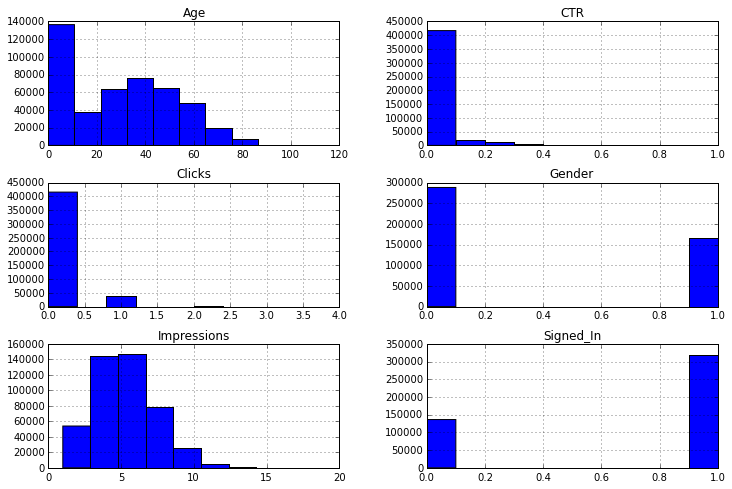

In [37]:
df.hist(figsize=(12,8));

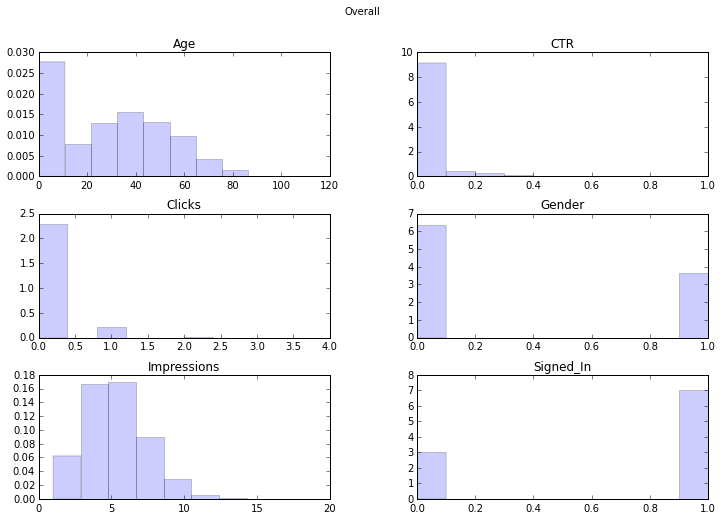

In [45]:
hecf = df.hist(figsize=(12,8), grid=False, normed=True, color='b', alpha=.2);
plt.suptitle('Overall');

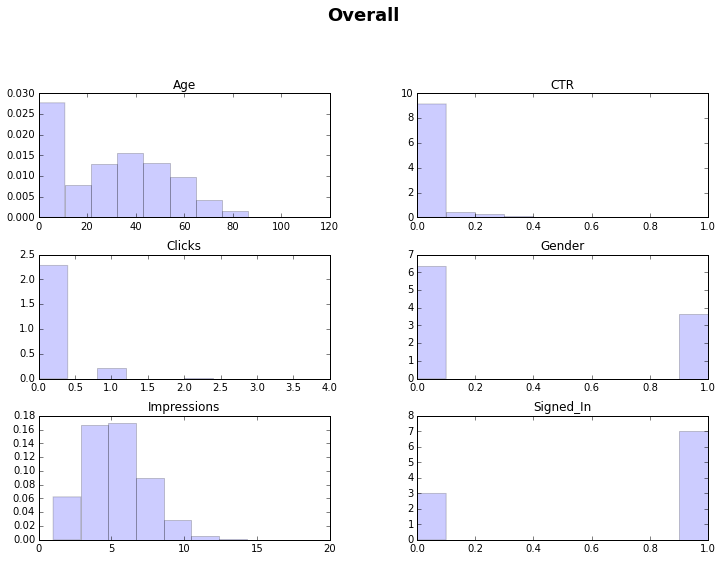

In [60]:
def plot_hist(df, title, color):
    df.hist(figsize=(12, 8), grid=False, normed=True, color=color, alpha=.2)
    plt.suptitle(title, size=18, weight='bold', y=1.05) #to place a title in the center

plot_hist(df, 'Overall', 'b')

In [47]:
df_signedin = df[df.Signed_In == 1]

In [48]:
df_signedin[:2]

,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0
1,73,1,3,0,1,0


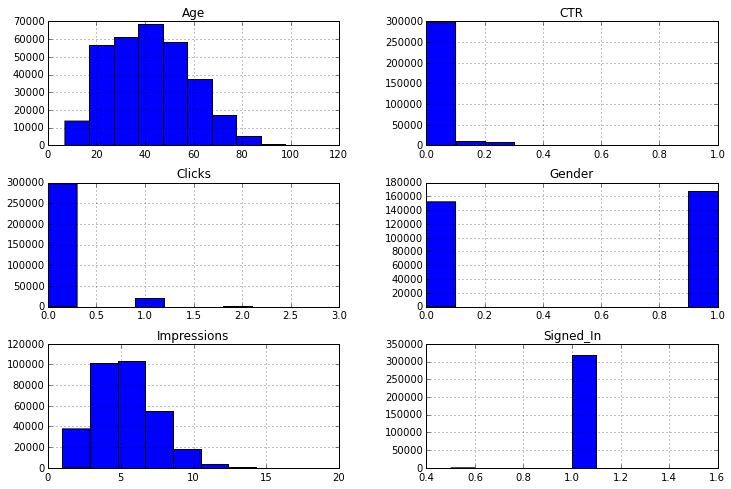

In [57]:
df_signedin.hist(figsize=(12, 8));

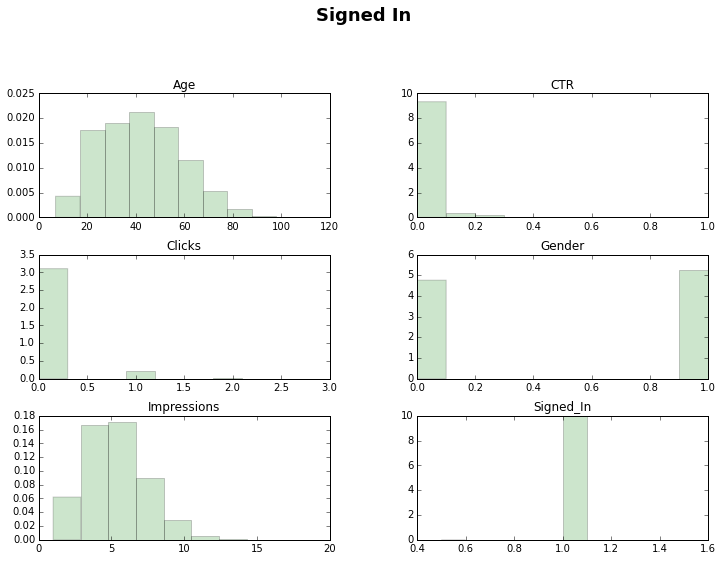

In [62]:
plot_hist(df_signedin, 'Signed In', 'g')

In [50]:
df_notsignedin = df[df.Signed_In != 1]

In [52]:
df_notsignedin[:2]

,Age,Gender,Impressions,Clicks,Signed_In,CTR
6,0,0,7,1,0,0.142857
10,0,0,8,1,0,0.125000


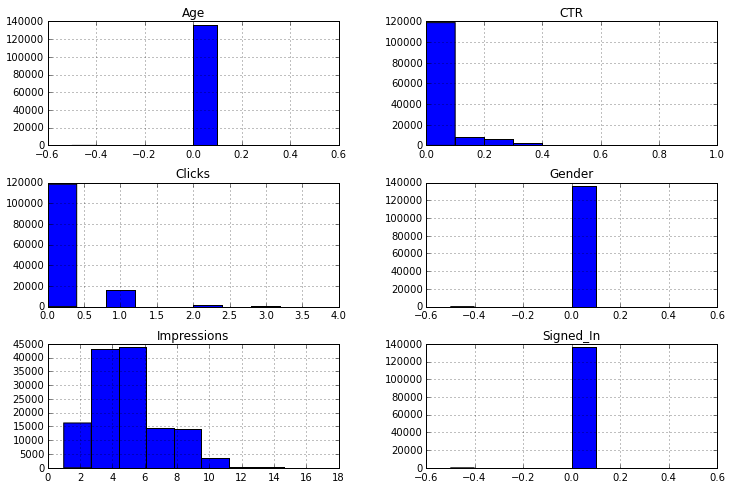

In [64]:
df_notsignedin.hist(figsize=(12, 8));

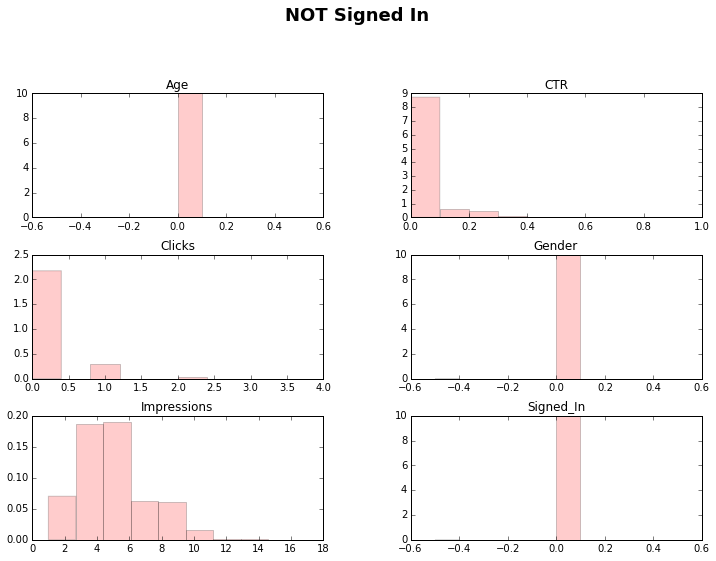

In [65]:
plot_hist(df_notsignedin, 'NOT Signed In', 'r')

In [76]:
scis.ttest_ind(df_signedin.CTR,df_notsignedin.CTR, equal_var=False)

Ttest_indResult(statistic=-55.376117934260868, pvalue=0.0)

In [68]:
df_signedin.CTR.mean()

0.01425363523213594

In [75]:
df_notsignedin.CTR.mean()

0.028354907061657893

Signed in Mean CTR 0.0142536352321
Not Signed in Mean CTR 0.0283549070617
Difference in means: 0.0141012718295
P-value: 0.0


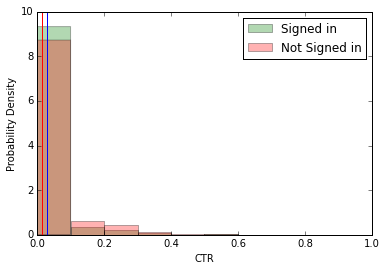

In [78]:
def welch_ttest(df1, df2, name_1, name_2):
    mean_signedin = df1.CTR.mean()
    mean_notsignedin = df2.CTR.mean()
    
    
    print '{} Mean CTR {}'.format(name_1, mean_signedin)
    print '{} Mean CTR {}'.format(name_2, mean_notsignedin)
    print 'Difference in means:', abs(mean_signedin - mean_notsignedin)
    
    p_val = scis.ttest_ind(df1['CTR'], df2['CTR'], equal_var = False)[1]
    print 'P-value:', p_val
    
    df1['CTR'].hist(normed = True, label=name_1, color='g', alpha=0.3)
    plt.axvline(mean_signedin, color='r', lw=1)
    df2['CTR'].hist(normed = True, label=name_2, color='r', alpha=0.3)
    plt.axvline(mean_notsignedin, color='b', lw=1)
    
    plt.ylabel('Probability Density')
    plt.xlabel('CTR')
    plt.grid('off')
    plt.legend()
    
    
welch_ttest(df_signedin, df_notsignedin, 'Signed in', 'Not Signed in')


In [80]:
df_signedin.Gender.value_counts()

1    167146
0    152052
dtype: int64

In [82]:
male = df_signedin[df_signedin.Gender == 1]
female = df_signedin[df_signedin.Gender != 1]

male Mean CTR 0.0139185242976
female Mean CTR 0.0146220121839
Difference in means: 0.000703487886268
P-value: 0.00100285273131


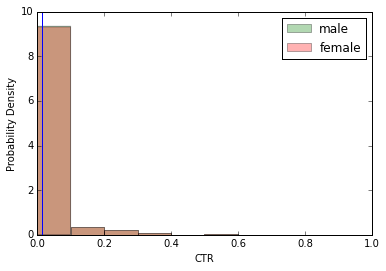

In [85]:
welch_ttest(male, female, 'male', 'female');

In [94]:
df_signedin.Age.value_counts(sort=True, ascending=False)

37     7941
36     7885
42     7871
41     7844
38     7842
39     7757
43     7726
40     7635
48     7221
53     7189
46     7141
52     7118
51     7097
47     7020
49     7012
50     6933
30     6572
27     6510
19     6464
23     6437
32     6408
31     6395
33     6383
26     6374
22     6350
21     6340
29     6324
28     6323
20     6291
18     5394
       ... 
82      545
83      482
84      365
85      294
11      283
86      227
87      210
88      155
89      128
10      112
90      105
91       71
92       65
94       49
9        48
93       41
95       35
96       27
8        15
98       15
97       13
99        9
7         5
100       4
101       4
107       2
102       2
103       2
104       1
108       1
dtype: int64

In [95]:
df_signedin['AgeGroup'] = pd.cut(df_signedin.Age, [7, 18, 24, 34, 44, 54, 64, 1000])

/Users/eloisaelias/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
df_signedin.AgeGroup

0           (34, 44]
1         (64, 1000]
2           (24, 34]
3           (44, 54]
4           (44, 54]
5           (44, 54]
7           (44, 54]
8            (7, 18]
9           (44, 54]
11          (18, 24]
13          (54, 64]
14          (24, 34]
16          (34, 44]
17          (24, 34]
18          (34, 44]
20          (54, 64]
21          (54, 64]
22          (44, 54]
23          (24, 34]
25          (18, 24]
26          (18, 24]
27          (44, 54]
28          (44, 54]
29          (18, 24]
30          (18, 24]
31        (64, 1000]
32          (18, 24]
33          (34, 44]
34          (24, 34]
35          (18, 24]
             ...    
458401      (24, 34]
458403      (34, 44]
458404      (44, 54]
458405      (24, 34]
458409      (24, 34]
458410      (34, 44]
458411      (54, 64]
458412    (64, 1000]
458414      (18, 24]
458415      (34, 44]
458416      (24, 34]
458417      (34, 44]
458418      (54, 64]
458419      (44, 54]
458420      (44, 54]
458421      (44, 54]
458422      (

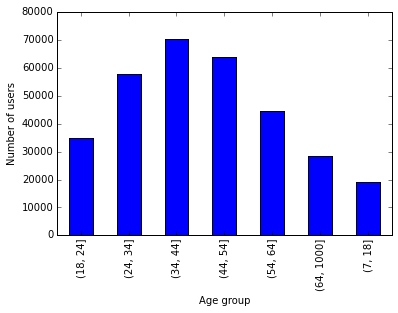

In [99]:
df_signedin.AgeGroup.value_counts().sort_index().plot(kind='bar', grid=False);
plt.xlabel('Age group');
plt.ylabel('Number of users');

In [103]:
#generate the combinations of the pair age group
pairs = combinations(pd.unique(df_signedin.AgeGroup), 2)
print list(pairs)

[('(34, 44]', '(64, 1000]'), ('(34, 44]', '(24, 34]'), ('(34, 44]', '(44, 54]'), ('(34, 44]', '(7, 18]'), ('(34, 44]', '(18, 24]'), ('(34, 44]', '(54, 64]'), ('(34, 44]', nan), ('(64, 1000]', '(24, 34]'), ('(64, 1000]', '(44, 54]'), ('(64, 1000]', '(7, 18]'), ('(64, 1000]', '(18, 24]'), ('(64, 1000]', '(54, 64]'), ('(64, 1000]', nan), ('(24, 34]', '(44, 54]'), ('(24, 34]', '(7, 18]'), ('(24, 34]', '(18, 24]'), ('(24, 34]', '(54, 64]'), ('(24, 34]', nan), ('(44, 54]', '(7, 18]'), ('(44, 54]', '(18, 24]'), ('(44, 54]', '(54, 64]'), ('(44, 54]', nan), ('(7, 18]', '(18, 24]'), ('(7, 18]', '(54, 64]'), ('(7, 18]', nan), ('(18, 24]', '(54, 64]'), ('(18, 24]', nan), ('(54, 64]', nan)]


In [131]:
results = pd.DataFrame()
pairs = combinations(pd.unique(df_signedin.AgeGroup), 2)

for age_1, age_2 in pairs:
    CTR_1 = df_signedin[df_signedin.AgeGroup == age_1]['CTR']
    CTR_2 = df_signedin[df_signedin.AgeGroup == age_2]['CTR']
    p_val = scis.ttest_ind(CTR_1, CTR_2, equal_var=False)[1]
    CTR_m1 = CTR_1.mean()
    CTR_m2 = CTR_2.mean()
    difference = abs(CTR_m1 - CTR_m2)
    results = results.append(dict(one=age_1, two=age_2, mean1=CTR_m1, mean2=CTR_m2, diff=difference, p=p_val), ignore_index=True)

    
results[['one', 'two', 'mean1', 'mean2', 'diff', 'p']]

results[results['p'] < alpha].sort('diff', ascending=False)


,diff,mean1,mean2,one,p,two
10,0.020082,0.029803,0.009720,"(64, 1000]",2.458627e-272,"(18, 24]"
8,0.019845,0.029803,0.009958,"(64, 1000]",1.430923e-295,"(44, 54]"
7,0.019656,0.029803,0.010146,"(64, 1000]",7.860398e-285,"(24, 34]"
0,0.019516,0.010286,0.029803,"(34, 44]",5.245541e-288,"(64, 1000]"
22,0.016865,0.026585,0.009720,"(7, 18]",6.900980e-144,"(18, 24]"
18,0.016628,0.009958,0.026585,"(44, 54]",4.014382e-151,"(7, 18]"
14,0.016439,0.010146,0.026585,"(24, 34]",7.449266e-146,"(7, 18]"
3,0.016299,0.010286,0.026585,"(34, 44]",4.575147e-146,"(7, 18]"
25,0.010586,0.009720,0.020307,"(18, 24]",1.007813e-130,"(54, 64]"
20,0.010349,0.009958,0.020307,"(44, 54]",2.525271e-151,"(54, 64]"


In [138]:
results = pd.DataFrame()
pairs = combinations(pd.unique(df_signedin.AgeGroup), 2)

for age_1, age_2 in pairs:
    CTR_1 = df_signedin[df_signedin.AgeGroup == age_1].CTR
    CTR_2 = df_signedin[df_signedin.AgeGroup == age_2].CTR
    p_val = scis.ttest_ind(CTR_1, CTR_2, equal_var=False)[1]
    CTR_m1 = CTR_1.mean()
    CTR_m2 = CTR_2.mean()
    difference = abs(CTR_m1 - CTR_m2)
    results = results.append(dict(one=age_1, two=age_2, mean1=CTR_m1, mean2=CTR_m2, diff=difference, p=p_val), ignore_index=True)

    
results = results[['one', 'two', 'mean1', 'mean2', 'diff', 'p']] # Order of the columns

results[results['p'] < alpha].sort('diff', ascending=False)


,one,two,mean1,mean2,diff,p
10,"(64, 1000]","(18, 24]",0.029803,0.009720,0.020082,2.458627e-272
8,"(64, 1000]","(44, 54]",0.029803,0.009958,0.019845,1.430923e-295
7,"(64, 1000]","(24, 34]",0.029803,0.010146,0.019656,7.860398e-285
0,"(34, 44]","(64, 1000]",0.010286,0.029803,0.019516,5.245541e-288
22,"(7, 18]","(18, 24]",0.026585,0.009720,0.016865,6.900980e-144
18,"(44, 54]","(7, 18]",0.009958,0.026585,0.016628,4.014382e-151
14,"(24, 34]","(7, 18]",0.010146,0.026585,0.016439,7.449266e-146
3,"(34, 44]","(7, 18]",0.010286,0.026585,0.016299,4.575147e-146
25,"(18, 24]","(54, 64]",0.009720,0.020307,0.010586,1.007813e-130
20,"(44, 54]","(54, 64]",0.009958,0.020307,0.010349,2.525271e-151
